<a href="https://colab.research.google.com/github/zuzanna-w17/ML-course/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

# Libraries

In [3]:
import numpy as np
import pandas as pd 
import sklearn # shortcut of scikit-learn

sklearn.__version__

'1.0.1'

# Data generating

In [4]:
data = {
    "size": ["XL", "L", "M", "L", "M"],
    "color": ["red", "green", "blue", "green", "red"],
    "gender": ["female", "male", "male", "female", "female"],
    "price": [199.0, 89.0, 99.0, 129.0, 79.0],
    "weight": [500, 450, 300, 380, 410],
    "bought": ["yes", "no", "yes", "no", "yes"]
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [5]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [6]:
# change type "object" of categorical variables
for col in ["size", "color", "gender", "bought"]:
  df[col] = df[col].astype("category")

df["weight"] = df["weight"].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 628.0 bytes


In [ ]:
# describe shows summary results only for numerical variables
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [7]:
# show statistics of category variables
df.describe(include=["category"]).T

,count,unique,top,freq
size,5,3,M,2
color,5,3,red,2
gender,5,2,female,3
bought,5,2,yes,3


# Data coding

In [8]:
from sklearn.preprocessing import LabelEncoder # class to be used only for dependent variable!!!

le = LabelEncoder() # class instant 
le.fit(df["bought"]) # fit coder to variable
le.transform(df["bought"]) # do mapping

array([1, 0, 1, 0, 1])

In [9]:
# faster = fit & do mapping
le.fit_transform(df["bought"])

array([1, 0, 1, 0, 1])

In [10]:
# apply changes
df["bought"] = le.fit_transform(df["bought"])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [11]:
# inverse mapping (before change)
le.inverse_transform(df["bought"])

array(['yes', 'no', 'yes', 'no', 'yes'], dtype=object)

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [12]:
from sklearn.preprocessing import OneHotEncoder # class to be used for independent variable!!!

encoder = OneHotEncoder(sparse=False) # to keep whole data matrix in memory
encoder.fit(df[["size"]])

OneHotEncoder(sparse=False)

In [13]:
encoder.transform(df[["size"]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [14]:
encoder.categories_ # values: L, M, XL in the above matrix's columns

[array(['L', 'M', 'XL'], dtype=object)]

In [15]:
# linear dependence to be removed (one column to be removed)
encoder = OneHotEncoder(drop="first", sparse=False)

encoder.fit(df[["size"]])
encoder.transform(df[["size"]])

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [16]:
# get_dummies in Pandas - alternative to the above example
pd.get_dummies(data=df)

,price,weight,bought,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male
0,199.0,500.0,1,0,0,1,0,0,1,1,0
1,89.0,450.0,0,1,0,0,0,1,0,0,1
2,99.0,300.0,1,0,1,0,1,0,0,0,1
3,129.0,380.0,0,1,0,0,0,1,0,1,0
4,79.0,410.0,1,0,1,0,0,0,1,1,0


In [17]:
# with linearity dependence removed
pd.get_dummies(data=df, drop_first=True)

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [18]:
# update new colnames
pd.get_dummies(data=df, drop_first=True, prefix="new")

,price,weight,bought,new_M,new_XL,new_green,new_red,new_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
# update new colnames
pd.get_dummies(data=df, drop_first=True, prefix_sep="-")

,price,weight,bought,size-M,size-XL,color-green,color-red,gender-male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [19]:
# only selected columns to be coded
pd.get_dummies(data=df, drop_first=True, columns=["size"])

,color,gender,price,weight,bought,size_M,size_XL
0,red,female,199.0,500.0,1,0,1
1,green,male,89.0,450.0,0,0,0
2,blue,male,99.0,300.0,1,1,0
3,green,female,129.0,380.0,0,0,0
4,red,female,79.0,410.0,1,1,0


# Standardize data

In [20]:
df["price"]

0    199.0
1     89.0
2     99.0
3    129.0
4     79.0
Name: price, dtype: float64

In [22]:
df["price"].mean()

119.0

In [21]:
df["price"].std()

48.47679857416329

In [23]:
# standarized
(df["price"] - df["price"].mean()) / df["price"].std()

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [24]:
def standarize(x):
  return (x - x.mean()) / x.std()

standarize(df["price"])

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [25]:
# inbuilt library
from sklearn.preprocessing import scale

# quite different values as estimator can be implemented as biased or unbiased variance estimator
scale(df["price"])

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["price"]])
scaler.transform(df[["price"]])

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [27]:
scaler_price = StandardScaler()
df["price"] = scaler_price.fit_transform(df[["price"]])

scaler_weight = StandardScaler()
df["weight"] = scaler_weight.fit_transform(df[["weight"]])

In [28]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,1
1,L,green,male,-0.691898,0.623610,0
2,M,blue,male,-0.461266,-1.603567,1
3,L,green,female,0.230633,-0.415740,0
4,M,red,female,-0.922531,0.029696,1


# Data pre-processing

In [29]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [30]:
le = LabelEncoder()

df["bought"] = le.fit_transform(df["bought"])

scaler = StandardScaler()
df[["price", "weight"]] = scaler.fit_transform(df[["price", "weight"]])

df = pd.get_dummies(data=df, drop_first=True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0


# Missing data

In [33]:
data = {
    "size": ["XL", "L", "M", np.nan, "M", "M"],
    "color": ["red", "green", "blue", "green", "red", "green"],
    "gender": ["female", "male", np.nan, "female", "female", "male"],
    "price": [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    "weight": [500, 450, 300, np.nan, 410, np.nan],
    "bought": ["yes", "no", "yes", "no", "yes", "no"]
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [34]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [35]:
# find fields with missing data
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [36]:
# check summary of missing data in each variable
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [37]:
# check summary of total missing data
df.isnull().sum().sum()

5

In [39]:
# class to fill in missig data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean") # strategy can be "constant" too, or "most_frequent" (the most common value)
imputer.fit(df[["weight"]]) # fit filling in missing data by mean 

SimpleImputer()

In [40]:
imputer.statistics_ # check mean 

array([415.])

In [41]:
# apply the fit
imputer.transform(df[["weight"]])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [42]:
df[["weight"]] = imputer.transform(df[["weight"]])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [43]:
df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [44]:
df.fillna(value="missing")

,size,color,gender,price,weight,bought
0,XL,red,female,199,500.0,yes
1,L,green,male,89,450.0,no
2,M,blue,missing,missing,300.0,yes
3,missing,green,female,129,415.0,no
4,M,red,female,79,410.0,yes
5,M,green,male,89,415.0,no


In [47]:
df["size"].fillna(value="L", inplace=True) # inplace assign the new value on a fly
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [48]:
# remove rows with missing data
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


# Missing data in time series

In [50]:
data = {"price": [108, 108, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start="01-01-2020 09:00", end="01-01-2020 18:00", periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,108.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


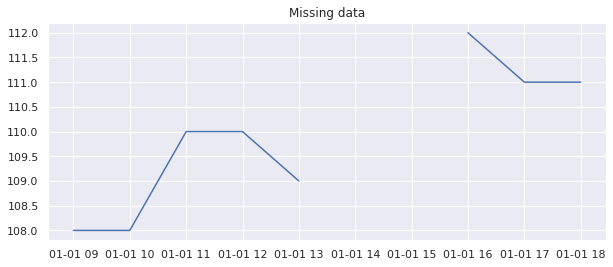

In [56]:
# add plot libraries
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt # basic plot library
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10,4))
plt.title("Missing data")
_ = plt.plot(df.price)

In [57]:
# interactive plots
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, "index", "price", width=600, height=400,
        title="Time series - missing data")

In [59]:
# remove missing obs
df_plotly = df_plotly.dropna()

px.line(df_plotly, "index", "price", width=600, height=400,
         title="Time series - missing data")

In [62]:
# substitute missing data by constant value
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(0)
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")

In [64]:
# substitute missing data by mean value
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(df_plotly["price"].mean())
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")

In [65]:
# substitute missing data by interpolation
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].interpolate()
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")

In [67]:
# substitute missing data by backward fill
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(method="bfill") # "ffile" is forward fill
px.line(df_plotly, "index", "price_fill", width=600, height=400,
        title="Time series - missing data")